In [2]:
from PIL import Image,ImageOps
import numpy as np
import pytesseract
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

from matplotlib.pyplot import figure

In [3]:
# """
# Description : OCR 
# """

# All the required functions

def residual_noise_removal(s):
    s=s.replace("aell1","ae11")
    s=s.replace("aell","ae11")
    s=s.replace("ael","ae1")
    s=s.replace("]1","1")
    s=s.replace("]","1")
    s=s.replace("?","2")
    s=s.replace("corel","core1")
    return s

def remove_noise_and_smooth(img):
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    or_image = cv2.bitwise_or(img, closing)
    return or_image

def textCheck(imgData):
# """
# Input : Image 
# output : text found in image
# """
    ret,img = cv2.threshold(np.array(imgData), 125, 255, cv2.THRESH_BINARY)

    #remove noise
    img=remove_noise_and_smooth(img)
    new_image = Image.fromarray(img.astype(np.uint8))

    # padding and expansion	
    new_image=ImageOps.expand(new_image,(0,0,0,10),(256,256,256))
    new_image = Image.fromarray(np.array(new_image)).convert('L') #now need gray scale

    basewidth = 900

    new_image = new_image.resize((900,47), Image.ANTIALIAS)

    text = pytesseract.image_to_string(new_image, lang = 'eng')

    
    return text.strip()

    
#     text = list(text)
#     for i in range(len(text)):
#         if text[i]==']':
#             text[i]="1"
#         elif text[i]=='?':
#             text[i]="2"
#     text = "".join(text)

In [4]:
# This function takes all the images from a folder and makes a dataframe which contains the name of the file, the output by
# Sunil sir, the output after applying the logic and an empty column which has to be filled manually to check the actual correct output.

def load_images_from_folder(folder):     
    i=0                                  # This is just a counter to make sure the code is running
    images = []                          # Image array in which all the images from the folder are stored
    data = []
    df = pd.DataFrame(data, columns = ['Graph_Name', 'Original Title', 'Simple OCR1', 'OCR_Updated (OCR2)']) 
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        t = textCheck(img)
        df = df.append({'Graph_Name' : filename, 'Simple OCR1' : t,'OCR_Updated (OCR2)' : residual_noise_removal(t)} , ignore_index=True)
        i=i+1
        print(i)
        if img is not None:
            images.append(img)
    return images, df

In [5]:
# You can change this file destination according to the data present in your device

images, df = load_images_from_folder("cropTextImg/cropTextImg") 
df

1
2
3
4
5
6
7
8


KeyboardInterrupt: 

In [25]:
df.to_csv('OCR Output.csv') #For making the changes, I converted this csv into excel first

In [14]:
img=cv2.imread('portion_1_4.png')
textCheck(img)

'NNPCORE2 to PHPCORE2(aell 20G)'

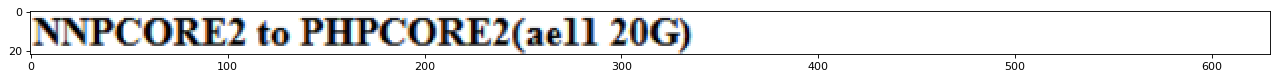

In [12]:
figure(num=None, figsize=(20, 25), dpi=80, facecolor='w', edgecolor='k')
img=mpimg.imread('portion_1_4.png')
inp_image=cv2.imread('portion_1_4.png')
# img = images[88]
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Python program to explain cv2.imread() method 
  
# importing cv2  
import cv2 
  
# path 
path = r'C:\Users\ASUS\Documents\Nokia\portion_1.png'
  
# Using cv2.imread() method 
img = cv2.imread(path) 
  
# Displaying the image 
cv2.imshow('image', img)
cv2.waitKey(0) # waits until key 0 is pressed
cv2.destroyAllWindows() # destroys the window showing image


In [ ]:
# import cv2 
inp_image=cv2.imread('cropTextImg\cropTextImg\portion_1.png')
cv2.imshow('Sample Image',inp_image)

cv2.waitKey(0) # waits until key 0 is pressed
cv2.destroyAllWindows() # destroys the window showing image
# # # # textCheck(inp_image)
# plt.imshow(inp_image)

In [ ]:
from PIL import Image
from pytesseract import image_to_string
print(len(image_to_string(Image.open('portion_1_1.png'))))
# print image_to_string(Image.open('test-english.jpg'), lang='eng')

In [ ]:
inp_image = cv2.imread('portion_1.png')

text = pytesseract.image_to_string(inp_image)
print(text)

In [ ]:
plt.imshow(inp_image)